# Initial test to run ECmean4 functions within the AQUA framework

Start loading the ecmean functions

In [1]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices

exp = '4km'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'interface_IFS+NEMO.yml'

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [2]:
global_mean(exp, year1, year2, numproc = numproc, config = 'config.yml', 
            interface = interface, loglevel = 'warning')

Average pme 0.003838254768066899
Average pr_oce 13.929526791983491
Average pme_oce -1.7249675182165578
Average pr_land 3.946351338755971
Average pme_land 1.7476267472828682
Average net_toa 3.911775077333521
Average net_sfc_nosn 4.699944004283183
Average net_sfc 3.726207006299519
Average toamsfc 0.18556804532731228
Average toamsfc_nosn -0.7881689525908472
Average tas 283.49485131169297
Average psl 101136.34371950463
Average pr 3.028001273472465
Average cll 0.35530130895263334
Average clm 0.23952226183723957
Average clh 0.3892167304429028
Average rsnt 246.20259680638978
Average rlnt -242.29082174022935
Average rsntcs 286.57336309798563
Average rlntcs -264.2232698767182
Average swcf -40.37076626782335
Average lwcf 21.932448090103954
Average rsns 167.32164169955217
Average rlns -57.905681669581945
Average hfss -87.59297909418024
Average hfls -17.12303689471893


Average tos 286.5078744046652
Average siconc_north 11.937540061983318
Average siconc_south 5.430473335096138
Done in 1.9251 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_4km_IFS+NEMO_r1i1p1f1_2020_2020.txt


Open the obtained txt file

In [3]:
table_name = '/work/bb1153/b382076/ecmean/tables/global_mean_' + exp + '_IFS+NEMO_r1i1p1f1_' + str(year1) + '_' + str(year2) + '.txt'
f = open(table_name, 'r')
file_contents = f.read()
print(file_contents)
f.close()

|   Variable   |                       Longname                        |  Units  |        IFS+NEMO |       Obs.       |  Dataset   |   Years   |
|--------------+-------------------------------------------------------+---------+-----------------+------------------+------------+-----------|
|     tas      |              2m Temperature (land-only)               |    K    |    283.495      |  286.847Â±0.301   |    CRU     | 1991-2020 |
|     psl      |                Mean Sea Level Pressure                |   Pa    | 101136          | 101143.004Â±5.191 |    ERA5    | 1991-2020 |
|      pr      |                     Precipitation                     | mm/day  |      3.028      |   2.853Â±0.039    |   MSWEP    | 1991-2020 |
|     pme      |            Precipitation minus Evaporation            | mm/day  |      0.00383825 |   0.023Â±0.021    |    ERA5    | 1991-2020 |
|     cll      |                    Low Cloud Cover                    |  frac   |      0.355301   |   0.382Â±0.003    |    ER

## Performance indices
Now try with Performance Indices

In [4]:
performance_indices(exp, year1, year2, numproc = numproc, config = 'config.yml', 
            interface = interface)

/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/dataarray.py:854: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Preproc in 5.1393 seconds


PI for Global ALL ta 18.604


PI for Global DJF ta 7.608


PI for Global JJA ta 19.414


PI for Global ALL ua 4.218


PI for Global DJF ua 2.366


PI for Global JJA ua 5.265


PI for Global ALL va 3.722


PI for Global DJF va 2.007


PI for Global JJA va 4.671


PI for Global ALL hus 14.121


PI for Global DJF hus 14.503


PI for Global JJA hus 13.469
PI for Global ALL net_sfc 3.24
PI for Global DJF net_sfc 3.511
PI for Global JJA net_sfc 2.863
PI for Global ALL tas 40.206
PI for Global DJF tas 18.789
PI for Global JJA tas 37.246
PI for Global ALL psl 3.35
PI for Global DJF psl 1.616
PI for Global JJA psl 2.961
PI for Global ALL pr 6.708
PI for Global DJF pr 4.596
PI for Global JJA pr 6.513
PI for Global ALL tauu 5.261
PI for Global DJF tauu 3.05
PI for Global JJA tauu 4.258
PI for Global ALL tauv 4.276
PI for Global DJF tauv 3.724
PI for Global JJA tauv 4.021
PI for Global ALL tos 12.803
PI for Global DJF tos 7.753
PI for Global JJA tos 10.6
PI for Global ALL siconc 4.886
PI for Global DJF siconc 2.077
PI for Global JJA siconc 11.451
Done in 6.4433 seconds with 1 processors
Postproc done in 1.3466 seconds


Performance indices produces a PDF file showing the PI relative to CMIP6 models. This cannot be easily imported within the jupyter workflow so that we try some trick to load it using external packages (as wand)

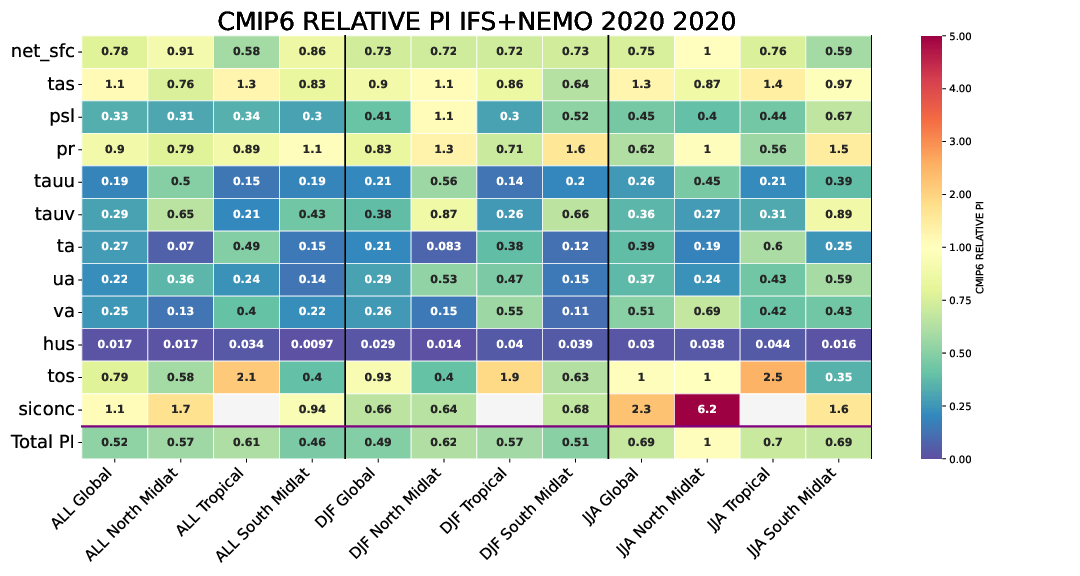

In [5]:
from wand.image import Image as WImage
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img